In [1]:
# part of group 2 project
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from itertools import combinations 
import time

In [2]:
"""
this is how we scale the data
we get the entire data to see how big it is then we can scale the data
we just append the line to a new list once the counter reaches the size 
size is a given percent of the data 
then that list is return with the specified percent of the data
"""
def scaledData(filename, percent):
    data = [i.strip().split() for i in open(filename,'r').readlines()]
    size = int(len(data) * percent)
    print(size)
    count =0
    newItemsets = []
    
    file1 = open(filename, 'r')
    Lines = file1.readlines()
    
    for line in Lines:
        if count<size:
            newItemsets.append(line.strip().split())
            count+=1

    return newItemsets

In [3]:
"""
this is pass 1 for apriori
makes canidates C1
count counts the canidates 
then it goes throught the count and 
the support is calculated and 
if the support is greater than the 
min_support then the freq items list 
appends the keys and the support for pass 1 
and L1 takes the keys
and then the passx function is called 
which take the L1, min_support, k, data, freq_item
"""
def pass1(data, min_support):
    start = time.time()
    
    C1 = []
    for basket in data:
        for item in basket:
            if not [item] in C1:
                C1.append([item])
    C1 = [set(x) for x in C1]
    
    end = time.time()
    print(end-start)
    print("Getting c1")
    start = time.time()
    
    count = {}
    freq_item = []
    L1 = []

    for basket in data:
        for item in C1:
            if item.issubset(basket):
                candidate = frozenset(item)
                if candidate not in count:
                    count[candidate] = 1
                else:
                    count[candidate] += 1
        
    #Calculate support for each item in C1
    end = time.time()
    print(end-start)
    print("Getting support for each C1")
    start = time.time()

    for key in count:
        support = count[key] / len(data)
        if support >= min_support:
            freq_item.insert(0, key)
            freq_item.insert(1, support)
            L1.insert(0, key)
    end = time.time()
    print(end-start)
    print("Checking support vs min")
    
    return (passesX(L1,min_support,2,data,freq_item))

In [4]:
"""
creates the canidates
this just goes though the frequents and 
makes new candites based on the value of k
this does like a triangular matrix 
it also sorts it so there isnt duplicaties like {6, 5} or {5, 6}
then its then returned 
"""
def createCk(Lk, k):
    
    cand_list = []
    len_Lk = len(Lk)
    
    for i in range(len_Lk):
        for j in range(i+1, len_Lk):
            L1 = list(Lk[i])[:k-2]
            L2 = list(Lk[j])[:k-2]
            L1.sort()
            L2.sort()
            if L1==L2:
                cand_list.append(Lk[i] | Lk[j])

    return cand_list

"""
this is pass x 
it does all of the pass for apriori that is not 
pass 1, it uses the k value as the pass number 
Ck is created from the frequent items from pass 1 and k=2
then it goes through the data and Ck can counts it used count dict 
then it goes throught the count and calculates the support and then
if the support is greater than the min_support then the key and support 
gets inserted into the freq_items list and keys get inserted into Lk 
(Lk now contains frequent items and frequent item pairs)
then as long as freq_items list is not empty it does resursion 
with an increased k value Lk and the new freq_items list
these steps just repeats until there is no freq items left then return the 
list of all of the Lk 
"""
def passesX(Lk,min_support,k,baskets_data,freq_items):
    start2 = time.time()
    Ck = createCk(freq_items[::2],k)
    CoolerCk = []
    print(Ck)
    print("Run =",k)
    count = {}
    freq_items = []
    
    for basket in baskets_data:
        for item in Ck:
            if item.issubset(basket):
                candidate = frozenset(item)
                if candidate not in count:
                    count[candidate] = 1
                else:
                    count[candidate] += 1

        
    for key in count:
        support = count[key]/len(baskets_data)
        if support >= min_support:
            freq_items.insert(0, key)
            freq_items.insert(1, support)
            Lk.insert(0, key)
    
    end2= time.time()
    print(end2-start2)
    print()
    if len(freq_items)>0:
        passesX(Lk,min_support,k+1,baskets_data,freq_items)
  
        return(Lk)

"""
this is a function where it calculates the time of how long it takes to compute 
apriori for given parameters. The same function is used to do all of the tests 
it just does min_support of 1% for scale of 20%, 40%, 60%, 80%, 100% then 
min_support of 2% for scale of 20%, 40%, 60%, 80%, 100% then 
min_support of 5% for scale of 20%, 40%, 60%, 80%, 100% 
"""
def runTime(filename, scalePercent, xaxis, min_support):
    times = []
        
    for i in range(len(xaxis)):
        data = scaledData(filename, scalePercent[i])
        start = time.time()
        # function here
        pass1(data, min_support)
        
        current = time.time()
        seconds = current - start
        times.append(seconds)
    return times
    

17632
9.560411214828491
Getting c1
37.535056591033936
Getting support for each C1
0.0011742115020751953
Checking support vs min
[frozenset({'3270', '8978'}), frozenset({'2238', '8978'}), frozenset({'1859', '8978'}), frozenset({'1715', '8978'}), frozenset({'1578', '8978'}), frozenset({'1344', '8978'}), frozenset({'1327', '8978'}), frozenset({'1233', '8978'}), frozenset({'1198', '8978'}), frozenset({'1146', '8978'}), frozenset({'1121', '8978'}), frozenset({'1034', '8978'}), frozenset({'1004', '8978'}), frozenset({'976', '8978'}), frozenset({'956', '8978'}), frozenset({'855', '8978'}), frozenset({'846', '8978'}), frozenset({'824', '8978'}), frozenset({'783', '8978'}), frozenset({'769', '8978'}), frozenset({'749', '8978'}), frozenset({'740', '8978'}), frozenset({'677', '8978'}), frozenset({'647', '8978'}), frozenset({'604', '8978'}), frozenset({'592', '8978'}), frozenset({'589', '8978'}), frozenset({'570', '8978'}), frozenset({'533', '8978'}), frozenset({'522', '8978'}), frozenset({'475', 

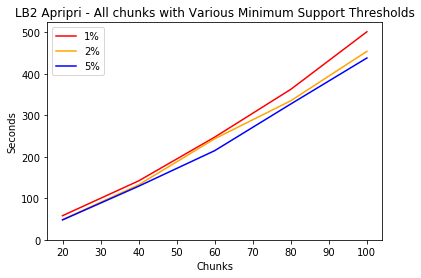

In [5]:
xaxis = [20, 40, 60, 80, 100]
scalePercent = [0.2, 0.4, 0.6, 0.8, 1.0]
filename = 'retail.dat.txt'
title = 'P2 Apripri - All chunks with Various Minimum Support Thresholds'
xLabel = 'Chunks'
yLabel = 'Seconds'
min_support = [ 0.01, 0.02, 0.05]
time1 = runTime(filename, scalePercent, xaxis, min_support[0])
time2 = runTime(filename, scalePercent, xaxis, min_support[1])
time5 = runTime(filename, scalePercent, xaxis, min_support[2])
pl.plot(xaxis, time1, color='red', label="1%")                     
pl.plot(xaxis, time2, color='orange', label="2%")  
pl.plot(xaxis, time5, color='blue', label="5%")  
pl.legend(loc="upper left")          
pl.title(title)
pl.ylabel(yLabel)                         
pl.xlabel(xLabel)   
pl.ylim(ymin=0)
title += '.png'
pl.savefig(title)
pl.show() 